# Keras 연습

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
from tensorflow import keras
print(keras.__version__)

2.7.0


In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input

In [4]:
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [5]:
from keras import backend as K

In [6]:
batch_size = 128
n_classes = 10
n_epoches = 15

im_row, im_col = 28, 28

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

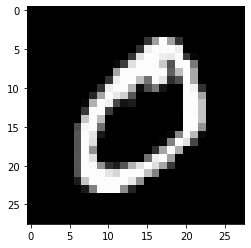

In [9]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

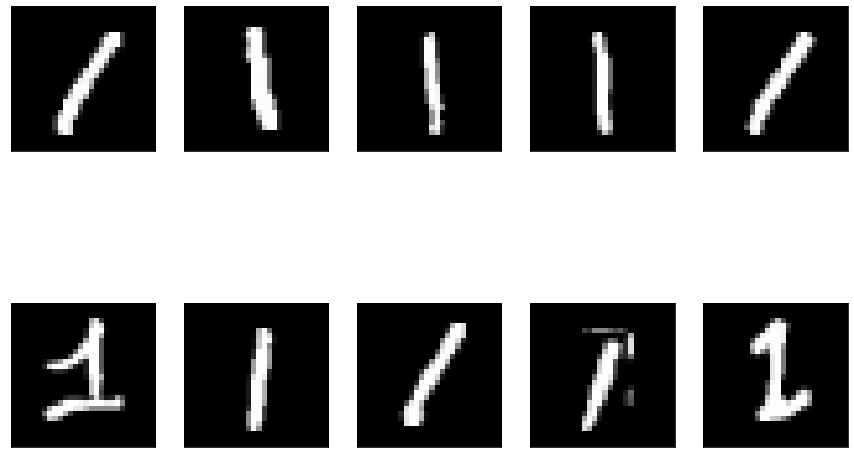

In [10]:
fig = plt.figure(figsize=(15, 10))

i = 0

for f in range(0, y_train.shape[0]):
    if(y_train[f] == 1 and i < 10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_train[f], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        i += 1

plt.show()

In [11]:
print(f'X_train : {X_train.shape}\nX_test : {X_test.shape}')

X_train : (60000, 28, 28)
X_test : (10000, 28, 28)


In [12]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, im_row, im_col)
    X_test = X_test.reshape(X_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    X_train = X_train.reshape(X_train.shape[0], im_row, im_col, 1)
    X_test = X_test.reshape(X_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col , 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adam(),
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [17]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='keras_MNIST_CNN.h5',
                                               save_best_only=True)

model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoches, validation_data=(X_test, y_test), callbacks=[checkpoint])

score = model.evaluate(X_test, y_test)

Epoch 1/15
469/469 [==============================] - 11s 7ms/step - loss: 0.2379 - accuracy: 0.9283 - val_loss: 0.0558 - val_accuracy: 0.9824
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0852 - accuracy: 0.9751 - val_loss: 0.0356 - val_accuracy: 0.9888
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0308 - val_accuracy: 0.9901
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0272 - val_accuracy: 0.9904
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0271 - val_accuracy: 0.9918
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0260 - val_accuracy: 0.9911
Epoch

In [18]:
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Test loss: 0.02990388497710228
Test Accuracy: 0.9921000003814697


In [19]:
from sklearn.metrics import roc_auc_score

preds = model.predict(X_test)
auc = roc_auc_score(np.round(preds), y_test)
print('AUC: {:2%}'.format(auc))

AUC: 99.578459%


In [20]:
print('Predictions for X_test[0]: {}\n\nActual label for X_test[0]: {}\n'.format(preds[0], y_test[0]))
print('Predictions for X_test[0] after rounding: {}\n'.format(np.round(preds)[0]))

Predictions for X_test[0]: [1.4221522e-18 4.9730582e-14 8.7073996e-15 4.3797461e-13 7.5432477e-15
 8.8872994e-16 6.5178086e-23 1.0000000e+00 3.1937666e-16 2.3604855e-12]

Actual label for X_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Predictions for X_test[0] after rounding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



# Pytorch 연습

In [21]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [23]:
device

device(type='cuda', index=0)

In [31]:
num_epoches = 15
num_classes = 10
batch_size = 128
learning_rate = 0.001

In [25]:
train_dataset = torchvision.datasets.MNIST(root='../../data/', train = True,
                                           transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [26]:
test_dataset = torchvision.datasets.MNIST('../../data', train = False, transform=transforms.ToTensor())

In [27]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [28]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32 ,3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    self.dense1 = nn.Linear(12*12*64, 128)
    self.dense2 = nn.Linear(128, num_classes)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.dropout(x, 0.25)
    x = x.view(-1, 12*12*64)
    x = F.relu(self.dense1(x))
    x = F.dropout(x, 0.5)
    x = self.dense2(x)

    return F.log_softmax(x, dim=1)

In [35]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)

for epoch in range(num_epoches):

  for i, (images, labels) in enumerate(train_loader):
    
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epoches, i+1, total_step, loss.item()))

Epoch [1/15], Step [100/469], Loss: 0.2536
Epoch [1/15], Step [200/469], Loss: 0.2360
Epoch [1/15], Step [300/469], Loss: 0.1725
Epoch [1/15], Step [400/469], Loss: 0.1015
Epoch [2/15], Step [100/469], Loss: 0.0892
Epoch [2/15], Step [200/469], Loss: 0.1045
Epoch [2/15], Step [300/469], Loss: 0.1830
Epoch [2/15], Step [400/469], Loss: 0.1027
Epoch [3/15], Step [100/469], Loss: 0.0882
Epoch [3/15], Step [200/469], Loss: 0.0633
Epoch [3/15], Step [300/469], Loss: 0.0846
Epoch [3/15], Step [400/469], Loss: 0.0544
Epoch [4/15], Step [100/469], Loss: 0.0318
Epoch [4/15], Step [200/469], Loss: 0.0521
Epoch [4/15], Step [300/469], Loss: 0.0868
Epoch [4/15], Step [400/469], Loss: 0.0475
Epoch [5/15], Step [100/469], Loss: 0.0818
Epoch [5/15], Step [200/469], Loss: 0.0356
Epoch [5/15], Step [300/469], Loss: 0.0723
Epoch [5/15], Step [400/469], Loss: 0.0197
Epoch [6/15], Step [100/469], Loss: 0.0278
Epoch [6/15], Step [200/469], Loss: 0.0189
Epoch [6/15], Step [300/469], Loss: 0.0584
Epoch [6/15

In [38]:
preds = []
y_true = []

model.eval()

with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    detached_pred = predicted.detach().cpu().numpy()
    detached_label = labels.detach().cpu().numpy()
    for f in range(0, len(detached_pred)):
      preds.append(detached_pred[f])
      y_true.append(detached_label[f])
    
  print('Test Accuracy of the model on 10000 test images: {:.2%}'.format(correct/total))

  preds = np.eye(num_classes)[preds]
  y_true = np.eye(num_classes)[y_true]
  auc = roc_auc_score(preds, y_true)
  print('AUC: {:.2%}'.format(auc))

torch.save(model.state_dict(), 'pytorch_mnist_cnn.ckpt')

Test Accuracy of the model on 10000 test images: 98.59%
AUC: 99.22%
